# IDX Data Cleaning

In [210]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore', FutureWarning)

import matplotlib.pyplot as plt


## Use only observations with PropertyType="Residential" and PropertySubType="SingleFamilyResidence" when construct the model and drop them

In [215]:
df_original = pd.read_csv('CRMLSSold202407_filled.csv')
df = df_original[(df_original['PropertyType'] == 'Residential') & (df_original['PropertySubType'] == 'SingleFamilyResidence')]
df = df.drop(columns=['PropertyType', 'PropertySubType'])
df

,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,OriginalListPrice,ListingKey,ListAgentEmail,...,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict,latfilled,lonfilled
22,Southland,Southland,NaN,False,NaN,NaN,False,929000.0,1079150669,joanne@thatgirlsellsre.com,...,3.0,False,2.0,Los Angeles Unified,91411,0.0,8080.0,NaN,True,True
23,SouthwestRiversideCounty,SouthwestRiversideCounty,NaN,True,NaN,NaN,True,710000.0,1079149608,Camouandassociates@outlook.com,...,3.0,False,3.0,Lake Elsinore Unified,92595,0.0,21780.0,NaN,True,True
24,NorthSanDiegoCounty,NorthSanDiegoCounty,"Carpet,SeeRemarks,Tile",True,NaN,NaN,False,1380000.0,1079137033,squisen@gmail.com,...,NaN,NaN,3.0,Ramona Unified,92065,0.0,646866.0,NaN,False,False
27,OrangeCounty,OrangeCounty,"Carpet,Laminate",False,NaN,NaN,False,1200000.0,1079115644,mwu111@yahoo.com,...,0.0,False,2.0,Poway Unified,92129,0.0,6800.0,NaN,True,True
29,PacificSouthwest,PacificSouthwest,NaN,True,NaN,NaN,True,1275000.0,1079102777,luay.zetouna@gmail.com,...,NaN,NaN,3.0,Grossmont Union,92019,225.0,13767.0,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26204,EastValley,EastValley,Vinyl,True,NaN,NaN,False,460000.0,1032121080,snippestates@gmail.com,...,3.0,False,2.0,Fontana Unified,92335,0.0,7290.0,NaN,True,True
26205,EastValley,EastValley,"Carpet,Vinyl",True,NaN,NaN,False,229500.0,1031855507,karen@winbigbear.com,...,2.0,False,0.0,Bear Valley Unified,92386,0.0,2375.0,NaN,True,True
26211,ContraCosta,ContraCosta,"Concrete,Laminate,Wood",NaN,NaN,NaN,False,475000.0,1025442475,bonniesdanes@windermere.com,...,NaN,False,0.0,NaN,94803,NaN,12150.0,NaN,True,True
26213,CaliforniaDesert,CaliforniaDesert,Tile,False,NaN,NaN,True,1799000.0,1023347719,info@omni-re.com,...,NaN,False,3.0,NaN,92201,150.0,16117.0,NaN,False,False


## drop the colmun if more than 5% of the data in it is NAN

In [216]:
df_na = df.dropna(thresh=int(0.95 * len(df)), axis=1)
df_na

,BuyerAgentAOR,ListAgentAOR,OriginalListPrice,ListingKey,ListAgentEmail,CloseDate,ClosePrice,ListAgentFirstName,ListAgentLastName,Latitude,...,PurchaseContractDate,ListingContractDate,StateOrProvince,FireplaceYN,LotSizeArea,GarageSpaces,PostalCode,LotSizeSquareFeet,latfilled,lonfilled
22,Southland,Southland,929000.0,1079150669,joanne@thatgirlsellsre.com,2024-07-31,929000.0,Joanne,Weissman Littman,34.178800,...,2024-07-22,2023-07-31,CA,True,8080.00,2.0,91411,8080.0,True,True
23,SouthwestRiversideCounty,SouthwestRiversideCounty,710000.0,1079149608,Camouandassociates@outlook.com,2024-07-31,710000.0,Anthony,Camou,33.611329,...,2024-07-01,2024-07-01,CA,True,21780.00,3.0,92595,21780.0,True,True
24,NorthSanDiegoCounty,NorthSanDiegoCounty,1380000.0,1079137033,squisen@gmail.com,2024-07-11,1380000.0,Sharon,Quisenberry,33.051272,...,2024-05-25,2024-05-25,CA,True,14.85,3.0,92065,646866.0,False,False
27,OrangeCounty,OrangeCounty,1200000.0,1079115644,mwu111@yahoo.com,2024-07-29,1107000.0,Michael,Wu,32.963632,...,2024-07-13,2024-07-02,CA,True,6800.00,2.0,92129,6800.0,True,True
29,PacificSouthwest,PacificSouthwest,1275000.0,1079102777,luay.zetouna@gmail.com,2024-07-25,1275000.0,Luay,Zetouna,32.771206,...,2024-04-20,2024-04-27,CA,True,13767.00,3.0,92019,13767.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26204,EastValley,EastValley,460000.0,1032121080,snippestates@gmail.com,2024-07-26,460000.0,DANIEL,SNIPP,34.086863,...,2024-06-04,2022-12-26,CA,True,7290.00,2.0,92335,7290.0,True,True
26205,EastValley,EastValley,229500.0,1031855507,karen@winbigbear.com,2024-07-26,230000.0,KAREN,LAVROUHIN,34.247582,...,2024-06-24,2022-12-16,CA,True,2375.00,0.0,92386,2375.0,True,True
26211,ContraCosta,ContraCosta,475000.0,1025442475,bonniesdanes@windermere.com,2024-07-02,450000.0,Bonnie,Andrews,37.977161,...,2022-10-08,2022-09-29,CA,True,12150.00,0.0,94803,12150.0,True,True
26213,CaliforniaDesert,CaliforniaDesert,1799000.0,1023347719,info@omni-re.com,2024-07-26,1425000.0,OMNI,Group,33.694246,...,2024-06-27,2022-10-07,CA,True,16117.00,3.0,92201,16117.0,False,False


## Columns with a unique value of less than 1% are considered categorical data, drop the text data

In [219]:
categorical_columns = []
text_columns = []

for col in df_na.select_dtypes(include=['object']).columns:
    unique_ratio = df_na[col].nunique() / len(df_na)
    if unique_ratio < 0.01:
        categorical_columns.append(col)
    else:
        text_columns.append(col)

print("categorical columns:", len(categorical_columns), categorical_columns)
print("text columns:", len(text_columns),text_columns )
df_cat = df_na.drop(columns=text_columns)
df_cat_nona = df_cat.dropna()
# also drop the column with same value and month, since they are all in Jan.
columns_to_drop = ['MlsStatus', 'StateOrProvince', 'CloseDate']
if 'BuyerAgencyCompensationType' in df_cat_nona.columns:
    columns_to_drop.append('BuyerAgencyCompensationType')
if 'ContractStatusChangeDate' in df_cat_nona.columns:
    columns_to_drop.append('ContractStatusChangeDate')

df_cat_nona = df_cat_nona.drop(columns=columns_to_drop)
df_cat_nona


categorical columns: 9 ['BuyerAgentAOR', 'ListAgentAOR', 'CloseDate', 'CountyOrParish', 'MlsStatus', 'BuyerOfficeAOR', 'ContractStatusChangeDate', 'StateOrProvince', 'FireplaceYN']
text columns: 15 ['ListAgentEmail', 'ListAgentFirstName', 'ListAgentLastName', 'UnparsedAddress', 'ListOfficeName', 'BuyerOfficeName', 'ListAgentFullName', 'BuyerAgentMlsId', 'BuyerAgentFirstName', 'BuyerAgentLastName', 'ListingId', 'City', 'PurchaseContractDate', 'ListingContractDate', 'PostalCode']


,BuyerAgentAOR,ListAgentAOR,OriginalListPrice,ListingKey,ClosePrice,Latitude,Longitude,LivingArea,ListPrice,DaysOnMarket,...,YearBuilt,StreetNumberNumeric,BathroomsTotalInteger,BedroomsTotal,FireplaceYN,LotSizeArea,GarageSpaces,LotSizeSquareFeet,latfilled,lonfilled
22,Southland,Southland,929000.0,1079150669,929000.0,34.178800,-118.452394,1731.0,929000.0,0,...,1943.0,5941.0,2.0,3.0,True,8080.00,2.0,8080.0,True,True
24,NorthSanDiegoCounty,NorthSanDiegoCounty,1380000.0,1079137033,1380000.0,33.051272,-116.880407,3400.0,1380000.0,0,...,2004.0,1303.0,3.0,4.0,True,14.85,3.0,646866.0,False,False
27,OrangeCounty,OrangeCounty,1200000.0,1079115644,1107000.0,32.963632,-117.119588,1932.0,1200000.0,0,...,1979.0,9585.0,3.0,3.0,True,6800.00,2.0,6800.0,True,True
29,PacificSouthwest,PacificSouthwest,1275000.0,1079102777,1275000.0,32.771206,-116.878196,2802.0,1275000.0,0,...,1995.0,3075.0,3.0,3.0,True,13767.00,3.0,13767.0,False,False
30,CitrusValley,CitrusValley,690000.0,1079064018,690000.0,34.121763,-117.874388,1080.0,690000.0,0,...,1954.0,957.0,1.0,3.0,False,6851.00,2.0,6851.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26204,EastValley,EastValley,460000.0,1032121080,460000.0,34.086863,-117.463890,966.0,460000.0,48,...,1987.0,15647.0,2.0,3.0,True,7290.00,2.0,7290.0,True,True
26205,EastValley,EastValley,229500.0,1031855507,230000.0,34.247582,-116.829663,600.0,229500.0,87,...,1979.0,261.0,1.0,2.0,True,2375.00,0.0,2375.0,True,True
26211,ContraCosta,ContraCosta,475000.0,1025442475,450000.0,37.977161,-122.297663,1481.0,475000.0,9,...,1939.0,469.0,2.0,3.0,True,12150.00,0.0,12150.0,True,True
26213,CaliforniaDesert,CaliforniaDesert,1799000.0,1023347719,1425000.0,33.694246,-116.254436,3308.0,1495000.0,629,...,2004.0,48789.0,4.0,5.0,True,16117.00,3.0,16117.0,False,False


## Convert categorical columns to numeric data

In [220]:
df_convert = df_cat_nona.applymap(lambda x: 1 if x is True else (0 if x is False else x))
df_convert

,BuyerAgentAOR,ListAgentAOR,OriginalListPrice,ListingKey,ClosePrice,Latitude,Longitude,LivingArea,ListPrice,DaysOnMarket,...,YearBuilt,StreetNumberNumeric,BathroomsTotalInteger,BedroomsTotal,FireplaceYN,LotSizeArea,GarageSpaces,LotSizeSquareFeet,latfilled,lonfilled
22,Southland,Southland,929000.0,1079150669,929000.0,34.178800,-118.452394,1731.0,929000.0,0,...,1943.0,5941.0,2.0,3.0,1,8080.00,2.0,8080.0,1,1
24,NorthSanDiegoCounty,NorthSanDiegoCounty,1380000.0,1079137033,1380000.0,33.051272,-116.880407,3400.0,1380000.0,0,...,2004.0,1303.0,3.0,4.0,1,14.85,3.0,646866.0,0,0
27,OrangeCounty,OrangeCounty,1200000.0,1079115644,1107000.0,32.963632,-117.119588,1932.0,1200000.0,0,...,1979.0,9585.0,3.0,3.0,1,6800.00,2.0,6800.0,1,1
29,PacificSouthwest,PacificSouthwest,1275000.0,1079102777,1275000.0,32.771206,-116.878196,2802.0,1275000.0,0,...,1995.0,3075.0,3.0,3.0,1,13767.00,3.0,13767.0,0,0
30,CitrusValley,CitrusValley,690000.0,1079064018,690000.0,34.121763,-117.874388,1080.0,690000.0,0,...,1954.0,957.0,1.0,3.0,0,6851.00,2.0,6851.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26204,EastValley,EastValley,460000.0,1032121080,460000.0,34.086863,-117.463890,966.0,460000.0,48,...,1987.0,15647.0,2.0,3.0,1,7290.00,2.0,7290.0,1,1
26205,EastValley,EastValley,229500.0,1031855507,230000.0,34.247582,-116.829663,600.0,229500.0,87,...,1979.0,261.0,1.0,2.0,1,2375.00,0.0,2375.0,1,1
26211,ContraCosta,ContraCosta,475000.0,1025442475,450000.0,37.977161,-122.297663,1481.0,475000.0,9,...,1939.0,469.0,2.0,3.0,1,12150.00,0.0,12150.0,1,1
26213,CaliforniaDesert,CaliforniaDesert,1799000.0,1023347719,1425000.0,33.694246,-116.254436,3308.0,1495000.0,629,...,2004.0,48789.0,4.0,5.0,1,16117.00,3.0,16117.0,0,0


In [223]:
df_convert['CountyOrParish'] = df_convert['CountyOrParish'].astype('category')  
df_convert['CountyOrParish'] = df_convert['CountyOrParish'].cat.codes.astype(float) 
df_convert['BuyerOfficeAOR'] = df_convert['BuyerOfficeAOR'].astype('category')  
df_convert['BuyerOfficeAOR'] = df_convert['BuyerOfficeAOR'].cat.codes.astype(float) 
df_convert['BuyerAgentAOR'] = df_convert['BuyerAgentAOR'].astype('category')  
df_convert['BuyerAgentAOR'] = df_convert['BuyerAgentAOR'].cat.codes.astype(float) 
df_convert['ListAgentAOR'] = df_convert['ListAgentAOR'].astype('category')  
df_convert['ListAgentAOR'] = df_convert['ListAgentAOR'].cat.codes.astype(float) 
df_convert

,BuyerAgentAOR,ListAgentAOR,OriginalListPrice,ListingKey,ClosePrice,Latitude,Longitude,LivingArea,ListPrice,DaysOnMarket,...,YearBuilt,StreetNumberNumeric,BathroomsTotalInteger,BedroomsTotal,FireplaceYN,LotSizeArea,GarageSpaces,LotSizeSquareFeet,latfilled,lonfilled
22,47.0,47.0,929000.0,1079150669,929000.0,34.178800,-118.452394,1731.0,929000.0,0,...,1943.0,5941.0,2.0,3.0,1,8080.00,2.0,8080.0,1,1
24,28.0,28.0,1380000.0,1079137033,1380000.0,33.051272,-116.880407,3400.0,1380000.0,0,...,2004.0,1303.0,3.0,4.0,1,14.85,3.0,646866.0,0,0
27,31.0,31.0,1200000.0,1079115644,1107000.0,32.963632,-117.119588,1932.0,1200000.0,0,...,1979.0,9585.0,3.0,3.0,1,6800.00,2.0,6800.0,1,1
29,34.0,34.0,1275000.0,1079102777,1275000.0,32.771206,-116.878196,2802.0,1275000.0,0,...,1995.0,3075.0,3.0,3.0,1,13767.00,3.0,13767.0,0,0
30,6.0,6.0,690000.0,1079064018,690000.0,34.121763,-117.874388,1080.0,690000.0,0,...,1954.0,957.0,1.0,3.0,0,6851.00,2.0,6851.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26204,12.0,12.0,460000.0,1032121080,460000.0,34.086863,-117.463890,966.0,460000.0,48,...,1987.0,15647.0,2.0,3.0,1,7290.00,2.0,7290.0,1,1
26205,12.0,12.0,229500.0,1031855507,230000.0,34.247582,-116.829663,600.0,229500.0,87,...,1979.0,261.0,1.0,2.0,1,2375.00,0.0,2375.0,1,1
26211,9.0,9.0,475000.0,1025442475,450000.0,37.977161,-122.297663,1481.0,475000.0,9,...,1939.0,469.0,2.0,3.0,1,12150.00,0.0,12150.0,1,1
26213,5.0,5.0,1799000.0,1023347719,1425000.0,33.694246,-116.254436,3308.0,1495000.0,629,...,2004.0,48789.0,4.0,5.0,1,16117.00,3.0,16117.0,0,0


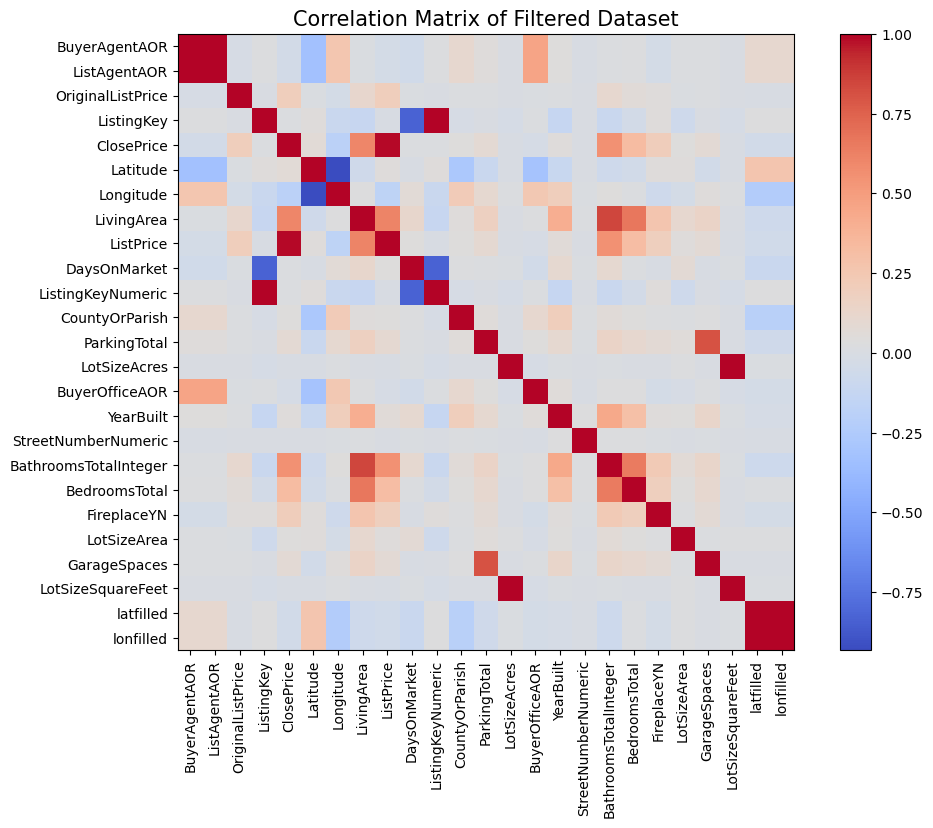

In [224]:

summary_stats = df_convert.describe()
# Correlation matrix to identify relationships between numerical variables and the target variable 'ClosePrice'
correlation_matrix = df_convert.corr()

plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Matrix of Filtered Dataset", size=15)
plt.show()

In [227]:
threshold = 0.5
relevant_features = correlation_matrix['ClosePrice'][abs(correlation_matrix['ClosePrice']) > threshold].index.tolist()

relevant_features.remove('ClosePrice')
print("Features with high correlation to ClosePrice:")
for feature in relevant_features:
    correlation_value = correlation_matrix.loc[feature, 'ClosePrice']
    print(f"{feature}: correlation = {correlation_value:.2f}")


Features with high correlation to ClosePrice:
LivingArea: correlation = 0.61
ListPrice: correlation = 0.99
BathroomsTotalInteger: correlation = 0.55
